In [1]:
import xarray
import dask

import pandas as pd
import seaborn as sns

In [2]:
dask.config.set(scheduler="processes")

In [3]:
sns.set_theme()

# Projections of Future Changes in Climate

In [4]:
# Local access from the hub
# hist = xarray.open_dataset("/home/jovyan/IA-Monthly/netCDF/CMIP6/historical/t_CMIP6_historical_mon_185001-201412.nc").chunk({"member": 1})
# ssp585 = xarray.open_dataset("/home/jovyan/IA-Monthly/netCDF/CMIP6/ssp585/t_CMIP6_ssp585_mon_201501-210012.nc").chunk({"member": 1})
# ssp245 = xarray.open_dataset("/home/jovyan/IA-Monthly/netCDF/CMIP6/ssp245/t_CMIP6_ssp245_mon_201501-210012.nc").chunk({"member": 1})
# ssp126 = xarray.open_dataset("/home/jovyan/IA-Monthly/netCDF/CMIP6/ssp126/t_CMIP6_ssp126_mon_201501-210012.nc").chunk({"member": 1})

# Remote access from anywhere
hist = xarray.open_zarr("https://api.cloud.ifca.es:8080/swift/v1/IPCC-IA-Monthly/zarr/CMIP6/historical/t_CMIP6_historical_mon_185001-201412").chunk({"member": 1})
ssp585 = xarray.open_zarr("https://api.cloud.ifca.es:8080/swift/v1/IPCC-IA-Monthly/zarr/CMIP6/ssp585/t_CMIP6_ssp585_mon_201501-210012").chunk({"member": 1})
ssp245 = xarray.open_zarr("https://api.cloud.ifca.es:8080/swift/v1/IPCC-IA-Monthly/zarr/CMIP6/ssp245/t_CMIP6_ssp245_mon_201501-210012").chunk({"member": 1})
ssp126 = xarray.open_zarr("https://api.cloud.ifca.es:8080/swift/v1/IPCC-IA-Monthly/zarr/CMIP6/ssp126/t_CMIP6_ssp126_mon_201501-210012").chunk({"member": 1})

/opt/conda/lib/python3.10/site-packages/xarray/conventions.py:431: SerializationWarning: variable 't' has multiple fill values {1.0384593717069655e+34, -1.7014118e+38}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/conda/lib/python3.10/site-packages/xarray/conventions.py:431: SerializationWarning: variable 't' has multiple fill values {1.0384593717069655e+34, -1.7014118e+38}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/conda/lib/python3.10/site-packages/xarray/conventions.py:431: SerializationWarning: variable 't' has multiple fill values {1.0384593717069655e+34, -1.7014118e+38}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/conda/lib/python3.10/site-packages/xarray/conventions.py:431: SerializationWarning: variable 't' has multiple fill values {1.0384593717069655e+34, -1.7014118e+38}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [5]:
hist_ens_mean = hist["t"].mean(["lat", "lon"]).resample({"time": "Y"}).mean().compute()
ssp585_ens_mean = ssp585["t"].mean(["lat", "lon"]).resample({"time": "Y"}).mean().compute()
ssp245_ens_mean = ssp245["t"].mean(["lat", "lon"]).resample({"time": "Y"}).mean().compute()
ssp126_ens_mean = ssp126["t"].mean(["lat", "lon"]).resample({"time": "Y"}).mean().compute()

In [6]:
ssp126_ens_mean_df = ssp126_ens_mean.to_dataframe().reset_index()
ssp245_ens_mean_df = ssp245_ens_mean.to_dataframe().reset_index()
ssp585_ens_mean_df = ssp585_ens_mean.to_dataframe().reset_index()
hist_ens_mean_df = hist_ens_mean.to_dataframe().reset_index()

ssp126_ens_mean_df.insert(0, "experiment", "ssp126")
ssp245_ens_mean_df.insert(0, "experiment", "ssp245")
ssp585_ens_mean_df.insert(0, "experiment", "ssp585")
hist_ens_mean_df.insert(0, "experiment", "historical")

df = pd.concat([
    ssp126_ens_mean_df,
    ssp245_ens_mean_df,
    ssp585_ens_mean_df,
    hist_ens_mean_df,
])

[Text(0.5, 0, ''), Text(0, 0.5, 'Air Temperature (°C)')]

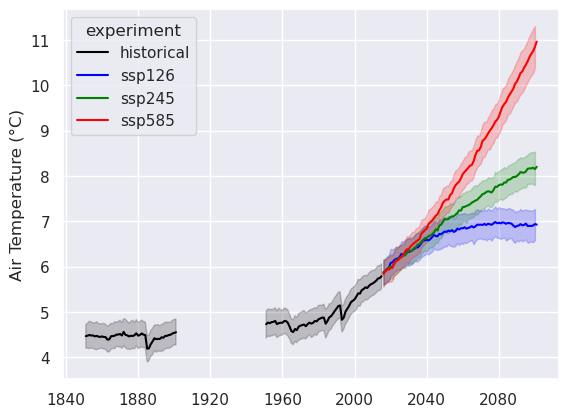

In [7]:
sns.lineplot(
    data=df,
    x="time",
    y="t",
    hue="experiment",
    hue_order=["historical", "ssp126", "ssp245", "ssp585"],
    palette=['black', 'blue', 'green', 'red']).set(
    xlabel=None,
    ylabel="Air Temperature (°C)")